In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

sns.set()


In [2]:
df = pd.read_csv('airquality.csv')

df.head()


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [7]:
wind_med = df.Wind.median()
# labels_wind = ['[1.7, 9.7]', '(9.7, 20.7]']

temp_med = df.Temp.median()
# labels_temp = ['[56, 79]', '(79, 97]']

print('Wind median:  ', wind_med)
print('Temp median:  ', temp_med)


Wind median:   9.7
Temp median:   79.0


## 2)

In [12]:
df['temp_bin'] = pd.cut(df.Temp, bins= [0, temp_med, df.Temp.max()], labels= ['Low', 'High'])
df['wind_bin'] = pd.cut(df.Wind, bins= [0, wind_med, df.Wind.max()], labels= ['Low', 'High'])
df.head()


,Ozone,Solar.R,Wind,Temp,Month,Day,temp_bin,wind_bin
0,41.0,190.0,7.4,67,5,1,Low,Low
1,36.0,118.0,8.0,72,5,2,Low,Low
2,12.0,149.0,12.6,74,5,3,Low,High
3,18.0,313.0,11.5,62,5,4,Low,High
4,NaN,NaN,14.3,56,5,5,Low,High


In [13]:
print(df.temp_bin.value_counts())
print(df.wind_bin.value_counts())


Low     80
High    73
Name: temp_bin, dtype: int64
Low     81
High    72
Name: wind_bin, dtype: int64


In [15]:
print(df[['temp_bin', 'wind_bin']].value_counts(normalize= True))


temp_bin  wind_bin
High      Low         0.320261
Low       High        0.313725
          Low         0.209150
High      High        0.156863
dtype: float64


### 3)

In [18]:
LM_temp_temp = smf.ols(formula= 'Ozone ~ temp_bin + wind_bin', data= df).fit()
print(LM_temp_temp.summary())


                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     46.33
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           2.02e-15
Time:                        16:15:16   Log-Likelihood:                -534.91
No. Observations:                 116   AIC:                             1076.
Df Residuals:                     113   BIC:                             1084.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.1682      4.429  

In [20]:
print('Wind p-Value: ', 0)
print('Temp p-Value: ', 0)
print('\nIt Seems that two variables have significant effect on target')


Wind p-Value:  0
Temp p-Value:  0

It Seems that two variables have significant effect on target


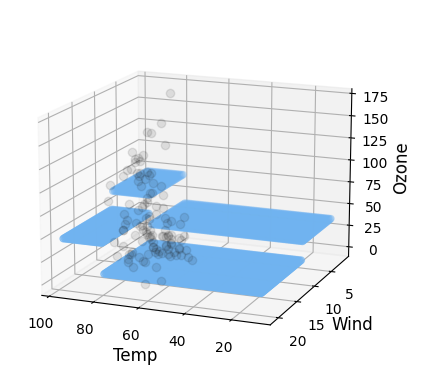

In [32]:
x1 = np.linspace(10, 100, 100)
x1_bin = pd.cut(x1, bins=[0, np.median(df['Temp']), np.max(df['Temp'])], labels=['Low', 'High'])

x2 = np.linspace(1, 25, 100)
x2_bin = pd.cut(x2, bins=[0, np.median(df['Wind']), np.max(df['Wind'])], labels=['Low', 'High'])

Temp, Wind = np.meshgrid(x1, x2)
temp_bin, wind_bin = np.meshgrid(x1_bin, x2_bin)

X_3d = np.array([Temp.flatten(), Wind.flatten()]).T
X_bin_3d = np.array([temp_bin.flatten(), wind_bin.flatten()]).T

X_bin_3d = pd.DataFrame(X_bin_3d, columns = ['temp_bin', 'wind_bin'])
preds_3d = LM_temp_temp.predict(X_bin_3d)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')

ax.plot(df['Temp'], df['Wind'], df['Ozone'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.3)
ax.scatter(Temp.flatten(), Wind.flatten(), preds_3d, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax.set_xlabel('Temp', fontsize=12)
ax.set_ylabel('Wind', fontsize=12)
ax.set_zlabel('Ozone', fontsize=12)

ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

# ax.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax.transAxes, color='grey', alpha=0.1)

ax.view_init(elev=15, azim=112)

fig.tight_layout()


### 4)

In [36]:
LM_temp_temp_interaction = smf.ols(formula= 'Ozone ~ temp_bin + wind_bin + temp_bin : wind_bin', data= df).fit()
print(LM_temp_temp_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     33.77
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.27e-15
Time:                        16:35:19   Log-Likelihood:                -532.28
No. Observations:                 116   AIC:                             1073.
Df Residuals:                     112   BIC:                             1084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [35]:
print('Wind p-Value: ', 0.129)
print('Temp p-Value: ', 0)
print('Interaction of Temp and Wind p- Value: ', 0.024)
print('\nIt Seems that interaction of two variables and Temperature variable have significant effect on target')


Wind p-Value:  0.129
Temp p-Value:  0
Interaction of Temp and Wind p- Value:  0.024

It Seems that interaction of two variables and Temperature variable have significant effect on target


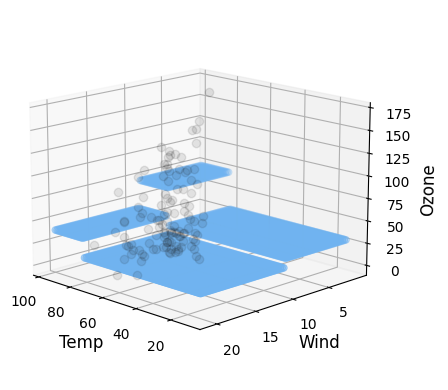

In [48]:
x1 = np.linspace(10, 100, 100)
x1_bin = pd.cut(x1, bins=[0, np.median(df['Temp']), np.max(df['Temp'])], labels=['Low', 'High'])

x2 = np.linspace(1, 25, 100)
x2_bin = pd.cut(x2, bins=[0, np.median(df['Wind']), np.max(df['Wind'])], labels=['Low', 'High'])

Temp, Wind = np.meshgrid(x1, x2)
temp_bin, wind_bin = np.meshgrid(x1_bin, x2_bin)

X_3d = np.array([Temp.flatten(), Wind.flatten()]).T
X_bin_3d = np.array([temp_bin.flatten(), wind_bin.flatten()]).T

X_bin_3d = pd.DataFrame(X_bin_3d, columns = ['temp_bin', 'wind_bin'])
preds_3d = LM_temp_temp_interaction.predict(X_bin_3d)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')

ax.plot(df['Temp'], df['Wind'], df['Ozone'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.3)
ax.scatter(Temp.flatten(), Wind.flatten(), preds_3d, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax.set_xlabel('Temp', fontsize=12)
ax.set_ylabel('Wind', fontsize=12)
ax.set_zlabel('Ozone', fontsize=12)

ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

# ax.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax.transAxes, color='grey', alpha=0.1)

ax.view_init(elev=15, azim=135)

fig.tight_layout()
